# Experiment4

## 이미지의 문제점
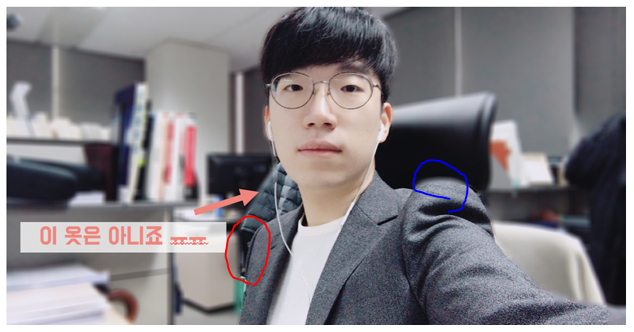

파랑색: 사람 부분에서 blur가 있음
빨강색: blur가 되어야 할 곳이 blur가 되지 않았음

## 해결방안 제안
1. 경계가 불명확한 문제
시멘틱 세그멘테이션 모델은 객체의 경계를 정확하게 구분하는 데 어려움을 겪는다. 

=> 해결방안:
-CRF(Conditional Random Field): 후처리 단계에서 CRF를 이용하여 경계를 더 정교하게 다듭는다.
-디코더 네트워크 개선:데이터를 복원하는 과정을 더욱 정확하게 한다.

2. 복잡한 사진을 세분화하기 어려움
복잡한 화면이나 배경이 존재하고 서로 중첩이 된 객체들이 많은 경우에는 정확하게 분리를 하는데 한계가 있다.

=> 해결 방안:
-Multi-Task Learning: 장면 분할과 같은 추가적인 학습 테스크를 결합하여 복잡한 장면에서 세밀한 정보를 더 잘 학습하도록 한다.
-Contextual Information Incorporation: 주변 문맥 정보를 활요하여 네트워크로 전체 장면을 더 잘 이해하고 분할한다.



## 실습

In [1]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from PIL import Image

1번 (1836, 3264, 3)
2번 (1836, 3264, 3)
3번 (1836, 3264, 3)
Cat (3192, 4469, 3)
Background (2304, 3456, 3)


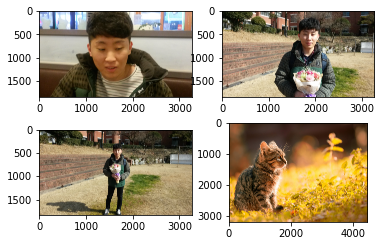

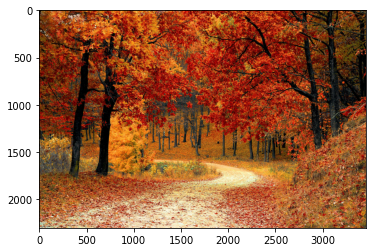

In [2]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/image1.jpg'
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/image2.jpg'  
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/image3.jpg'
cat_path = os.getenv('HOME')+'/aiffel/human_segmentation/Cat.jpg'
background_path = os.getenv('HOME')+'/aiffel/human_segmentation/Background.jpg'

img_orig1 = cv2.imread(img_path1)
img_orig2 = cv2.imread(img_path2)
img_orig3 = cv2.imread(img_path3)
cat = cv2.imread(cat_path)
background = cv2.imread(background_path)

print("1번", img_orig1.shape)
print("2번", img_orig2.shape)
print("3번", img_orig3.shape)
print("Cat", cat.shape)
print("Background", background.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)                    
ax1.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(2,2,2)                    
ax2.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
ax3 = fig.add_subplot(2,2,3)                    
ax3.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
ax4 = fig.add_subplot(2,2,4)                    
ax4.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
                       
plt.show()

plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/model' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7c888f7b99d0>)

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path1) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)
segvalues4, output4 = model.segmentAsPascalvoc(cat_path)
segvalues5, output5 = model.segmentAsPascalvoc(background_path)

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

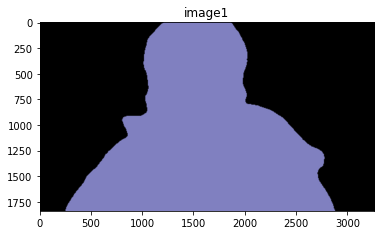

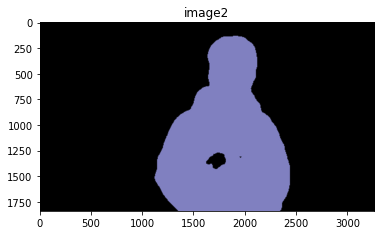

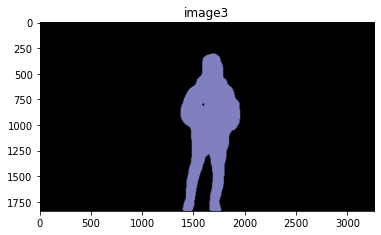

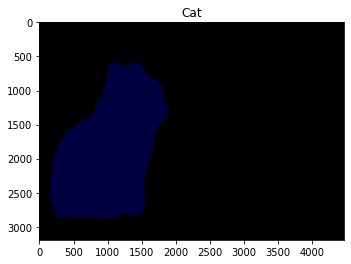

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.title("image1")
plt.show()

plt.imshow(output2)
plt.title("image2")
plt.show()

plt.imshow(output3)
plt.title("image3")
plt.show()

plt.imshow(output4)
plt.title("Cat")
plt.show()

In [8]:
print(segvalues) # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
print(segvalues4) # 고양이 사진
print(segvalues5) # 배경 사진

{'class_ids': array([ 0, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
{'class_ids': array([0, 8]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
{'class_ids': array([0]), 'masks': False}


In [9]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print("Image1")
    print(LABEL_NAMES[class_id])
    print("\n")
    
for class_id in segvalues2['class_ids']:
    print("Image2")
    print(LABEL_NAMES[class_id])
    print("\n")
    
for class_id in segvalues3['class_ids']:
    print("Image3")
    print(LABEL_NAMES[class_id])
    print("\n")
    
for class_id in segvalues4['class_ids']:
    print("Cat")
    print(LABEL_NAMES[class_id])
    print("\n")

Image1
background


Image1
person


Image2
background


Image2
person


Image3
background


Image3
person


Cat
background


Cat
cat




In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
print(colormap[15]) #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
print(colormap[8]) # 고양이
print(colormap[0]) # 배경

[192 128 128]
[64  0  0]
[0 0 0]


In [12]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color2 = (0, 0, 64)

(1836, 3264)


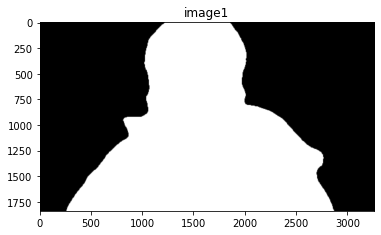

(1836, 3264)


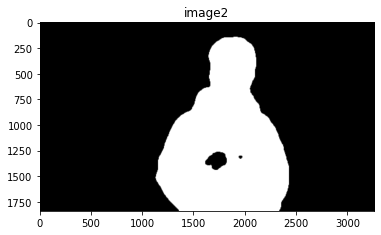

(1836, 3264)


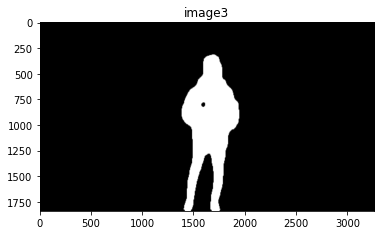

(3192, 4469)


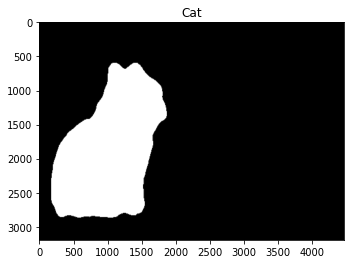

(2304, 3456)


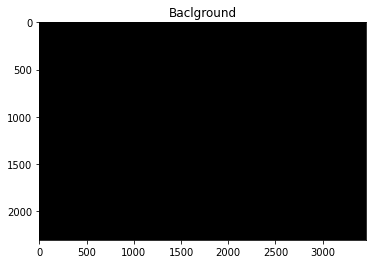

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1)
seg_map2 = np.all(output2==seg_color, axis=-1)
seg_map3 = np.all(output3==seg_color, axis=-1)
seg_map4 = np.all(output4==seg_color2, axis=-1)
seg_map5 = np.all(output5==seg_color, axis=-1)

print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.title("image1")
plt.show()

print(seg_map2.shape) 
plt.imshow(seg_map2, cmap='gray')
plt.title("image2")
plt.show()

print(seg_map3.shape) 
plt.imshow(seg_map3, cmap='gray')
plt.title("image3")
plt.show()

print(seg_map4.shape) 
plt.imshow(seg_map4, cmap='gray')
plt.title("Cat")
plt.show()

print(seg_map5.shape) 
plt.imshow(seg_map5, cmap='gray')
plt.title("Baclground")
plt.show()

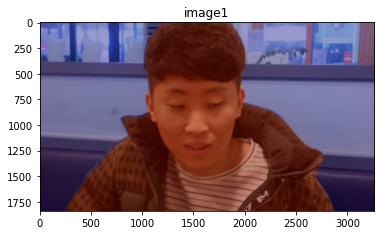

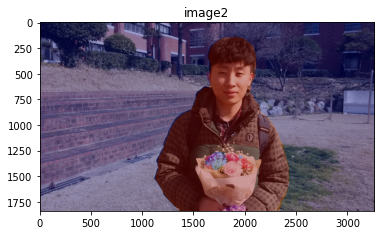

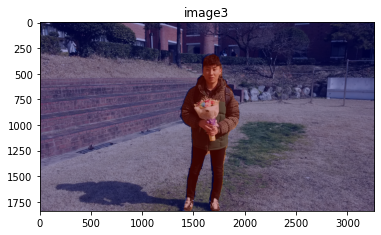

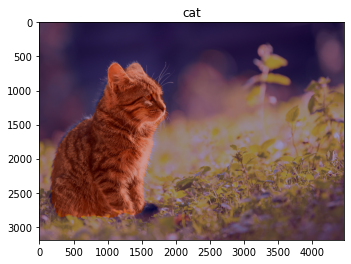

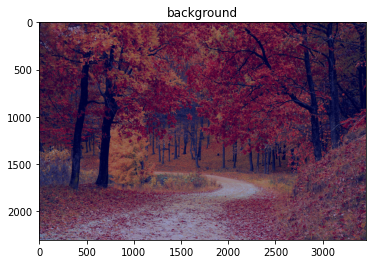

In [14]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig1.copy()
img_show2 = img_orig2.copy()
img_show3 = img_orig3.copy()
img_show4 = cat.copy()
img_show5 = background.copy()


# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask3 = seg_map3.astype(np.uint8) * 255
img_mask4 = seg_map4.astype(np.uint8) * 255
img_mask5 = seg_map5.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)
color_mask4 = cv2.applyColorMap(img_mask4, cv2.COLORMAP_JET)
color_mask5 = cv2.applyColorMap(img_mask5, cv2.COLORMAP_JET)


# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)
img_show3 = cv2.addWeighted(img_show3, 0.6, color_mask3, 0.4, 0.0)
img_show4 = cv2.addWeighted(img_show4, 0.6, color_mask4, 0.4, 0.0)
img_show5 = cv2.addWeighted(img_show5, 0.6, color_mask5, 0.4, 0.0)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.title("image1")
plt.show()

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.title("image2")
plt.show()

plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
plt.title("image3")
plt.show()

plt.imshow(cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB))
plt.title("cat")
plt.show()

plt.imshow(cv2.cvtColor(img_show5, cv2.COLOR_BGR2RGB))
plt.title("background")
plt.show()

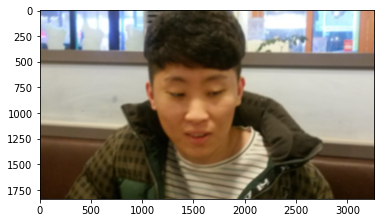

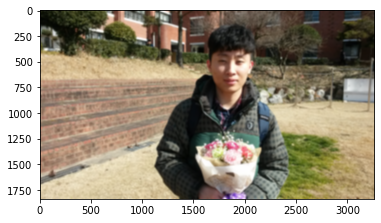

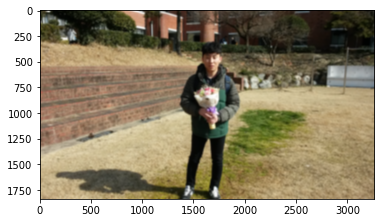

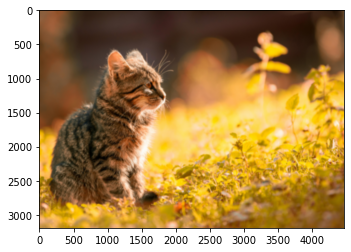

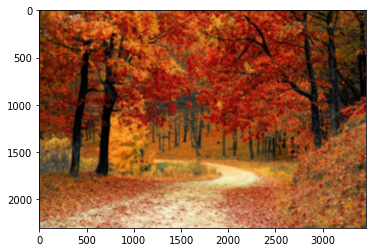

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig1, (20,20))
img_orig_blur2 = cv2.blur(img_orig2, (20,20))
img_orig_blur3 = cv2.blur(img_orig3, (20,20))
img_orig_blur4 = cv2.blur(cat, (20,20))
img_orig_blur5 = cv2.blur(background, (20,20))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur4, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur5, cv2.COLOR_BGR2RGB))
plt.show()

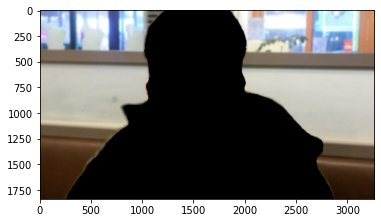

In [16]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

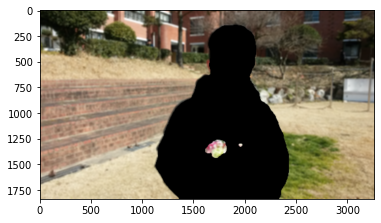

In [17]:
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 용량이 너무 커서 계속 Dead Kernal이 발생! ㅜㅜ

In [18]:
# '''
# img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
# img_bg_mask3 = cv2.bitwise_not(img_mask_color3)
# img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask3)
# plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))
# plt.show()
# '''

'\nimg_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)\nimg_bg_mask3 = cv2.bitwise_not(img_mask_color3)\nimg_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask3)\nplt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))\nplt.show()\n'

In [19]:
# img_mask_color4 = cv2.cvtColor(img_mask4, cv2.COLOR_GRAY2BGR)
# img_bg_mask4 = cv2.bitwise_not(img_mask_color4)
# img_bg_blur4 = cv2.bitwise_and(img_orig_blur4, img_bg_mask4)
# plt.imshow(cv2.cvtColor(img_bg_blur4, cv2.COLOR_BGR2RGB))
# plt.show()

In [ ]:
img_mask_color5 = cv2.cvtColor(img_mask5, cv2.COLOR_GRAY2BGR)
img_bg_mask5 = cv2.bitwise_not(img_mask_color5)
img_bg_blur5 = cv2.bitwise_and(img_orig_blur5, img_bg_mask5)
plt.imshow(cv2.cvtColor(img_bg_blur5, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat2 = np.where(img_mask_color==255, img_orig2, img_bg_blur2)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
'''
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat3 = np.where(img_mask_color==255, img_orig3, img_bg_blur3)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show() '''

In [ ]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat4 = np.where(img_mask_color==255, img_orig4, img_bg_blur4)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat4, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat5 = np.where(img_mask_color==255, img_orig5, img_bg_blur5)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat5, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
import matplotlib.pyplot as plt
img_concat = np.where(img_mask_color==255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img_concat2 = np.where(img_mask_color==255, img_orig_blur2, img_orig2)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# img_concat3 = np.where(img_mask_color==255, img_orig_blur3, img_orig3)
# plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
# plt.show()

In [ ]:
img_concat4 = np.where(img_mask_color==255, img_orig_blur4, img_orig4)
plt.imshow(cv2.cvtColor(img_concat4, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img_concat5 = np.where(img_mask_color==255, img_orig_blur5, img_orig5)
plt.imshow(cv2.cvtColor(img_concat5, cv2.COLOR_BGR2RGB))
plt.show()